In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



#https://www.kaggle.com/rajatranjan/mh-wipro-lag-notebook?scriptVersionId=86917655




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mh-wipro-sustainable-ml-challenge/sample_submission.csv
/kaggle/input/mh-wipro-sustainable-ml-challenge/train.csv
/kaggle/input/mh-wipro-sustainable-ml-challenge/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/mh-wipro-sustainable-ml-challenge/train.csv")
test = pd.read_csv("/kaggle/input/mh-wipro-sustainable-ml-challenge/test.csv")
sample = pd.read_csv("/kaggle/input/mh-wipro-sustainable-ml-challenge/sample_submission.csv")

train.head()



,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [3]:
print(train.shape)
train = train[train['Cloud Type']<10].copy()
train['Cloud Type'].replace(1,0,inplace=True)

(175296, 18)


In [4]:
train.loc[train[train['Clearsky DHI']>400].index,'Clearsky DHI'] = train.query('Year==2017 & Month==9 & Day==11')['Clearsky DHI'].quantile(0.85)

In [5]:
# test.groupby(['Month','Cloud Type']).mean()

<AxesSubplot:>

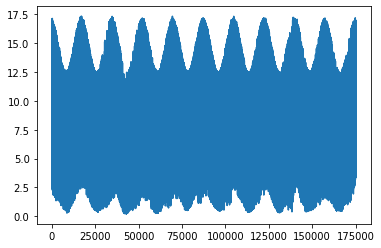

In [6]:
(train['Solar Zenith Angle']/(train['Pressure']/train['Relative Humidity'])).plot()

In [7]:
# ilocs_min = argrelextrema(train['Temperature'].values, np.less_equal, order=10*12)[0]
# train['Tem_min'] = 0
# train.loc[ilocs_min,'Tem_min'] = 1

# train.head()


In [8]:
# train['Tem_min'].value_counts()

In [9]:
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
%matplotlib inline
df = train.append(test,ignore_index=True)
df.head()
# for col in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Solar Zenith Angle','Precipitable Water','Pressure','Clearsky DNI','Clearsky DHI','Clearsky GHI']:
#     ilocs_min = argrelextrema(train[col].values, np.less_equal, order=10*12)[0]
#     ilocs_max = argrelextrema(train[col].values, np.greater_equal, order=10*12)[0]

#     train[col].plot(figsize=(20,8), alpha=.3,title=col)
#     # filter prices that are peaks and plot them differently to be visable on the plot
#     train.iloc[ilocs_max][col].plot(style='.', lw=10, color='red', marker="v");
#     train.iloc[ilocs_min][col].plot(style='.', lw=10, color='green', marker="^");
#     plt.show()



# train.groupby(['Year','Month'])['Temperature'].max()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0.0,0.0,0.0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0.0,0.0,0.0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0.0,0.0,0.0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0.0,0.0,0.0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0.0,0.0,0.0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [10]:
df[df['Clearsky DHI'].isnull()==True].index

Int64Index([175295, 175296, 175297, 175298, 175299, 175300, 175301, 175302,
            175303, 175304,
            ...
            192805, 192806, 192807, 192808, 192809, 192810, 192811, 192812,
            192813, 192814],
           dtype='int64', length=17520)

In [11]:

# for col in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Solar Zenith Angle','Precipitable Water','Pressure']:
#     ilocs_min = argrelextrema(df[col].values, np.less_equal, order=120)[0]
#     ilocs_max = argrelextrema(df[col].values, np.greater_equal, order=120)[0]
#     test_ind = df[df['Clearsky DHI'].isnull()==True].index
#     df[col].plot(figsize=(20,8), alpha=.3,title=col)
#     # filter prices that are peaks and plot them differently to be visable on the plot
#     df.iloc[ilocs_max][col].plot(style='.', lw=10, color='red', marker="v");
#     df.iloc[ilocs_min][col].plot(style='.', lw=10, color='green', marker="^");
#     df.iloc[test_ind][col].plot(alpha=.3, color='blue')
#     plt.show()


In [12]:

# for col in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Solar Zenith Angle','Precipitable Water','Pressure']:
#     df[col+'log'] =np.sqrt(df[col].values)
#     ilocs_min = argrelextrema(np.sqrt(df[col].values), np.less_equal, order=120)[0]
#     ilocs_max = argrelextrema(np.sqrt(df[col].values), np.greater_equal, order=120)[0]
# #     test_ind = df[df['Clearsky DHI'].isnull()==True].index
    
#     df[col+'log'].plot(figsize=(20,8), alpha=.3,title=col)
#     # filter prices that are peaks and plot them differently to be visable on the plot
#     df.iloc[ilocs_max][col+'log'].plot(style='.', lw=10, color='red', marker="v");
#     df.iloc[ilocs_min][col+'log'].plot(style='.', lw=10, color='green', marker="^");
#     df.iloc[test_ind][col+'log'].plot(alpha=.3, color='blue')
#     plt.show()


In [13]:
print(train.shape)
# train = train[train['Year']!=2018].copy()
print(train.shape)

(175295, 18)
(175295, 18)


In [14]:
df = train.append(test,ignore_index=True)
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0.0,0.0,0.0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0.0,0.0,0.0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0.0,0.0,0.0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0.0,0.0,0.0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0.0,0.0,0.0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [15]:
dt_cols=['Year', 'Month', 'Day', 'Hour', 'Minute']
df.sort_values(dt_cols,inplace=True)

In [16]:

# df_d = df.set_index('date')
# df_d.head()

In [17]:
# df.groupby(['Cloud Type','Year']).diff()

In [18]:
# df.sort_values(['Month','Day','Hour','Minute','Cloud Type','Year'])

In [19]:
# df.sort_values(['Year','Month','Day','Hour','Minute'])['Temperature'].diff()

In [20]:
df1 = df.groupby(['Year','Month','Day']).agg({
    'Dew Point' : ['min','max','mean'],
    'Pressure' : ['min','max'],
    'Relative Humidity' : ['min','max','mean'],
    'Precipitable Water' : ['min','max','mean'],
    'Wind Direction' : ['min','max','mean'],
    'Wind Speed' : ['min','max','mean'],
    'Fill Flag':['count']
})

df1.columns = ['YMD_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df = df.merge(df1,on=['Year','Month','Day'],how='left')
df1.head()

,Year,Month,Day,Dew PointYMD_min,Dew PointYMD_max,Dew PointYMD_mean,PressureYMD_min,PressureYMD_max,Relative HumidityYMD_min,Relative HumidityYMD_max,...,Precipitable WaterYMD_min,Precipitable WaterYMD_max,Precipitable WaterYMD_mean,Wind DirectionYMD_min,Wind DirectionYMD_max,Wind DirectionYMD_mean,Wind SpeedYMD_min,Wind SpeedYMD_max,Wind SpeedYMD_mean,Fill FlagYMD_count
0,2009,1,1,-4.0,2.0,-1.145833,1010,1010,43.57,93.01,...,0.475,1.067,0.588979,8.3,359.8,115.650000,1.3,4.8,2.862500,48
1,2009,1,2,0.0,15.0,6.770833,1000,1010,80.33,100.00,...,1.129,2.665,2.014458,90.2,223.3,166.737500,1.1,4.0,2.183333,48
2,2009,1,3,11.0,17.0,13.395833,1000,1000,84.79,100.00,...,2.566,3.350,2.811563,179.6,226.0,212.975000,1.2,3.2,1.841667,48
3,2009,1,4,11.0,17.0,14.687500,1000,1010,75.73,100.00,...,2.797,3.305,2.983375,178.8,253.6,215.483333,0.8,3.1,2.029167,48
4,2009,1,5,11.0,18.0,14.500000,1000,1010,76.98,100.00,...,2.793,3.432,3.031833,208.7,251.8,233.075000,1.0,3.5,1.731250,48


In [21]:
df1 = df.groupby(['Cloud Type','Year','Month']).agg({
    'Dew Point' : ['min','max','mean'],
    'Pressure' : ['min','max'],
    'Relative Humidity' : ['min','max','mean'],
    'Precipitable Water' : ['min','max','mean'],
    'Wind Direction' : ['min','max','mean'],
    'Wind Speed' : ['min','max','mean'],
    'Fill Flag':['count']
})

df1.columns = ['CYM_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df = df.merge(df1,on=['Cloud Type','Year','Month'],how='left')
df1.head()

,Cloud Type,Year,Month,Dew PointCYM_min,Dew PointCYM_max,Dew PointCYM_mean,PressureCYM_min,PressureCYM_max,Relative HumidityCYM_min,Relative HumidityCYM_max,...,Precipitable WaterCYM_min,Precipitable WaterCYM_max,Precipitable WaterCYM_mean,Wind DirectionCYM_min,Wind DirectionCYM_max,Wind DirectionCYM_mean,Wind SpeedCYM_min,Wind SpeedCYM_max,Wind SpeedCYM_mean,Fill FlagCYM_count
0,0,2009,1,-12.0,19.0,2.246190,990,1020,35.73,100.0,...,0.259,3.785,1.256623,5.2,359.8,227.737163,0.3,8.8,2.399883,853
1,0,2009,2,-12.0,18.0,1.052698,990,1020,31.06,100.0,...,0.216,4.011,0.840218,0.2,359.9,242.666123,0.6,6.6,2.395107,797
2,0,2009,3,-6.0,20.0,7.897316,990,1020,38.66,100.0,...,0.306,4.439,1.407270,1.7,356.1,177.005718,0.4,6.9,2.292649,857
3,0,2009,4,0.0,22.0,12.341772,980,1010,46.64,100.0,...,0.487,4.219,1.705919,1.6,359.8,206.584925,0.3,7.0,2.784695,869
4,0,2009,5,6.0,23.0,19.142857,990,1010,53.59,100.0,...,0.950,4.593,3.383112,10.4,357.3,210.491892,0.5,6.7,2.309266,518


In [22]:
del df1

In [23]:
df.groupby(['Year']).mean()

,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,...,Precipitable WaterCYM_min,Precipitable WaterCYM_max,Precipitable WaterCYM_mean,Wind DirectionCYM_min,Wind DirectionCYM_max,Wind DirectionCYM_mean,Wind SpeedCYM_min,Wind SpeedCYM_max,Wind SpeedCYM_mean,Fill FlagCYM_count
Year,,,,,,,,,,,,,,,,,,,,,
2009,6.526027,15.720548,11.500000,15.000000,55.028082,325.143322,253.753938,2.729509,13.817808,17.453767,...,1.152801,4.937478,2.910126,10.907751,349.344555,192.185559,0.373499,6.032203,2.377260,483.322146
2010,6.526027,15.720548,11.500000,15.000000,54.099715,330.447260,255.137329,1.839155,12.197660,17.411073,...,1.304301,4.681376,2.703820,9.556678,352.068008,201.111952,0.349874,5.826906,2.198082,681.721347
2011,6.526027,15.720548,11.500000,15.000000,57.966324,320.293893,253.696347,1.847945,12.365525,18.954338,...,1.250714,4.622533,2.675839,12.985166,350.436387,196.381404,0.410000,5.967837,2.349561,644.472032
2012,6.513661,15.756831,11.500000,15.000000,52.852288,328.909495,253.863730,2.480248,13.568761,19.032787,...,1.239897,4.747657,2.886217,10.003296,350.770293,184.993693,0.343625,5.998309,2.297495,535.633880
2013,6.526027,15.720548,11.500000,15.000000,52.963356,328.705023,253.931564,2.648345,13.897831,17.314954,...,1.345342,4.985749,2.984132,7.379235,350.039030,176.890023,0.403733,5.719966,2.312443,488.518379
2014,6.526027,15.720548,11.500000,15.000000,53.089384,330.267979,254.552683,2.421461,13.001427,17.161929,...,1.268358,4.781802,2.804511,7.953761,353.050622,197.271393,0.386787,5.647597,2.157397,546.273288
2015,6.526057,15.719847,11.500086,15.000856,52.524630,328.772989,253.276329,2.750557,14.660197,18.768423,...,1.315093,5.054088,3.146810,10.292836,352.370598,176.236926,0.335396,5.346578,2.204578,483.801187
2016,6.513661,15.756831,11.500000,15.000000,50.001082,337.939151,255.669684,2.384107,13.356500,18.894695,...,1.278194,4.841571,2.852029,9.978125,349.828580,190.217259,0.363912,5.879377,2.267822,625.363616
2017,6.526027,15.720548,11.500000,15.000000,52.560833,329.283162,253.989441,2.683219,14.168265,18.797888,...,1.197034,4.854904,2.961350,13.592363,348.626221,184.743493,0.325674,6.478562,2.217763,597.179909


In [24]:
syear = 1
print(train[train['Year']==2017].shape)
df['Clearsky DNI'].transform(lambda x: x.shift(17520))

(17520, 18)


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
192810    555.0
192811    388.0
192812    115.0
192813      0.0
192814      0.0
Name: Clearsky DNI, Length: 192815, dtype: float64

In [25]:
df.groupby(['Year','Month'])['Clearsky DNI'].transform(lambda x: x.shift(syear).rolling(2).mean()).isnull().sum()

17760

In [26]:
# train_d

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
# train['date'] = pd.to_datetime(train[dt_cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns"),format="%Y-%m-%d-%H-%M")


# def realized_volatility(series_log_return):
#     return np.sqrt(np.sum(series_log_return**2))

# realized_volatility(train['Clearsky DHI'])

In [28]:
# df.groupby(['Year','Month','Day']).agg()

In [29]:
4017/132

30.431818181818183

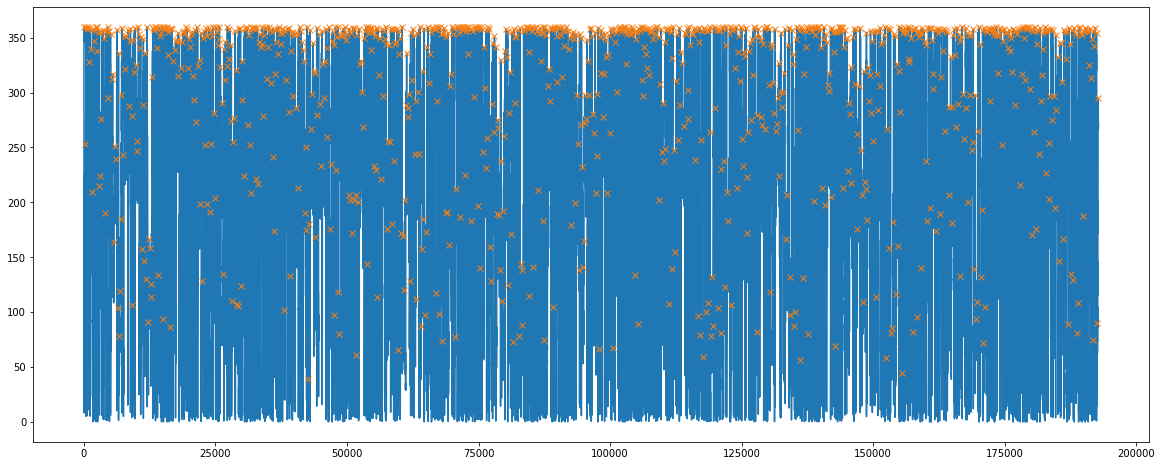

In [30]:
from scipy.signal import find_peaks
x = df['Wind Direction']
peaks, _ = find_peaks(x, distance=11*12)
plt.figure(figsize=(20,8))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()



In [31]:
df.iloc[peaks].shape

(1077, 54)

In [32]:
train[train['Year']==2017][dt_cols].dropna()

,Year,Month,Day,Hour,Minute
140256,2017,1,1,0,0
140257,2017,1,1,0,30
140258,2017,1,1,1,0
140259,2017,1,1,1,30
140260,2017,1,1,2,0
...,...,...,...,...,...
157771,2017,12,31,21,30
157772,2017,12,31,22,0
157773,2017,12,31,22,30
157774,2017,12,31,23,0


In [33]:
12*31*24*2*1.2

# 12*31*24

21427.2

In [34]:
!pip install pvlib

     |████████████████████████████████| 27.5 MB 882 kB/s            


In [35]:


import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.iotools import read_tmy3
# 20.5937, longitude = 78.9629 621
# 28.7041° N, 77.1025° E delhi 225
# 19.0760° N, 72.8777° 14 mumbai

# 920 12.9716° N, 77.5946° E
# train['date'] = pd.to_datetime(train[dt_cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns"),format="%Y-%m-%d-%H-%M")
# temp = pvlib.solarposition.get_solarposition(time=pd.DatetimeIndex(train['date'].values), latitude =20.5937, longitude = 78.9629, altitude=621 , 
#                                       pressure=train['Pressure'].values*100, method='nrel_numpy', temperature=train['Temperature'].values)

# temp

In [36]:
# tus = Location(20.5937, 78.9629, 'US/Arizona', 621, 'India')
# # times = pd.date_range(start=train['date'].min(), end=train['date'].max(), freq='30min')
# cs = tus.get_clearsky(pd.DatetimeIndex(train['date'].values),solar_position=temp,dni_extra=pvlib.irradiance.get_extra_radiation(pd.DatetimeIndex(train['date'].values)).values)
# cs

In [37]:
# temp['equation_of_time'].plot()

In [38]:
# train[['Solar Zenith Angle']].plot()

In [39]:
# train[['date','Solar Zenith Angle']]
# for col in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Solar Zenith Angle','Precipitable Water']:
#     for col2 in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Solar Zenith Angle','Precipitable Water']:
#         if col!=col2:
#             (df[col]/df[col2]).plot(title = col+'_'+col2)
#             plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler

def encode(data,col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

def get_clearsky_feats(df):
    tus = Location(20.5937, 78.9629, 'Asia/Calcutta', 621)
    
    temp = pvlib.solarposition.get_solarposition(time=pd.DatetimeIndex(df['date'].values), latitude =20.5937, longitude = 78.9629, altitude=621 , 
                                      pressure=df['Pressure'].values*100, method='nrel_numpy', temperature=df['Temperature'].values)
    
    df['zenith'] = temp['zenith']
    df['elevation'] = temp['elevation']
    df['azimuth'] = temp['azimuth']
    df['equation_of_time'] = temp['equation_of_time']
    
    
    apparent_zenith = df['Solar Zenith Angle'].values
    df['Airmass'] = pvlib.atmosphere.get_relative_airmass(df['Solar Zenith Angle'].values)
    df['Airmass'].fillna(0,inplace=True)
    # pressure = pvlib.atmosphere.alt2pres(altitude)
    df['Airmass_2'] = pvlib.atmosphere.get_absolute_airmass(df['Airmass'].values, df['Pressure'].values*100)
    df['Airmass_2'].fillna(0,inplace=True)
    df['turbidity'] = pvlib.clearsky.lookup_linke_turbidity(pd.DatetimeIndex(df['date'].values),  20.5937, 78.9629).values
#     df['DNI_extra'] = pvlib.irradiance.get_extra_radiation(pd.DatetimeIndex(df['date'].values)).values
    # an input is a pandas Series, so solis is a DataFrame
#     ineichen = pvlib.clearsky.ineichen(df['Solar Zenith Angle'].values, df['Airmass_2'].values, df['turbidity'].values, 621)
#     df['GHI_Calc'] = ineichen['ghi']
#     df['DHI_Calc'] = ineichen['dhi']
#     df['DNI_Calc'] = ineichen['dni']
#     df['GHI_calc'] = pvlib.clearsky.haurwitz(df['Solar Zenith Angle'])['ghi'].values

#     cs = tus.get_clearsky(pd.DatetimeIndex(df['date'].values),solar_position=temp,dni_extra=pvlib.irradiance.get_extra_radiation(pd.DatetimeIndex(df['date'].values)).values)
#     df['GHI_Calc'] = cs['ghi']
#     df['DHI_Calc'] = cs['dhi']
#     df['DNI_Calc'] = cs['dni']
    return df


def feature_engg(df):
    
    df['date'] = pd.to_datetime(df[dt_cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns"),format="%Y-%m-%d-%H-%M")
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofYear'] = df['date'].dt.dayofyear
    df['week'] = df['date'].dt.week


    df['quarter'] = df['date'].dt.quarter
    df['ismonthstart'] = df['date'].dt.is_month_start
    df['ismonthend'] = df['date'].dt.is_month_end
    
#     df['Cloud Count']=df.groupby(['Year','Month','Day'])['Cloud Type'].cumcount()
#     df['Temp Sum']=df.groupby(['Year','Month','Day'])['Temperature'].cumsum()
#     df['Wind Speed Sum']=df.groupby(['Year','Month','Day'])['Wind Speed'].cumsum()
#     df['Dew Point Sum']=df.groupby(['Year','Month','Day'])['Dew Point'].cumsum()
#     df['Pressure_by_deg'] = df['Pressure']/df['Temperature']
#     df['Humid_temp'] =df['Relative Humidity']/df['Temperature']
#     df['Wind_velocity'] =df['Wind Direction']/df['Wind Speed']
#     df['Wind_temp'] =df['Temperature']*df['Wind Speed']

    df['Cos Angle Val'] = np.cos(np.radians(df['Solar Zenith Angle']))
#     df['Inv Sin Angle Val'] = np.arcsin(np.cos(np.radians(df['Solar Zenith Angle'])))
#     df['Prec_water_changes'] =df['Cos Angle Val']*df['Precipitable Water']
#     df['Humid_changes'] =df['Cos Angle Val']*df['Relative Humidity']
#     df['Wind_speed_Changes'] =df['Cos Angle Val']*df['Wind Speed']
    print('Target Lags...')
    window_shifts = [2,4,12,24,48,60]
#     for col in ['Clearsky DNI','Clearsky DHI','Clearsky GHI']:
#         for window in [17500+x for x in [2,12,48,60,120,240]]:
#             df[col+'_shift_'+str(window)] = df.sort_values(dt_cols)[col].shift(window)
#             df[col+'_roll_mean_'+str(window)] = df.sort_values(dt_cols)[col].shift(window).rolling(window=window).mean()
#             df[col+'_roll_var_'+str(window)]=df.sort_values(dt_cols)[col].shift(window).rolling(window).var()
#             df[col+'_roll_std_'+str(window)] = df.sort_values(dt_cols)[col].shift(window).rolling(window=window).std()
#             df[col+'_exp_mean_'+str(window)] = df.sort_values(dt_cols)[col].expanding(window).mean()
#             df[col+'_exp_var_'+str(window)] = df.sort_values(dt_cols)[col].expanding(window).var()
    
    
    for col in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Solar Zenith Angle','Precipitable Water','Pressure']:
        ilocs_min = argrelextrema(df[col].values, np.less_equal, order=11*12*10)[0]
        ilocs_max = argrelextrema(df[col].values, np.greater_equal, order=11*12*10)[0]
        df[col+'_min'] = 0
        df.loc[ilocs_min,col+'_min'] = -1
        df.loc[ilocs_max,col+'_max'] = 1
    print('Features Lag...')
    for col in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Cos Angle Val','Precipitable Water']:
        
        
        for col2 in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Solar Zenith Angle','Precipitable Water']:
            if col!=col2:
                df[col+'_*_'+col2] = df[col]*df[col2]
                df[col+'_d_'+col2] = df[col]/(1+df[col2])
        df[col+'_cont_diff_'] = df.sort_values(['Month','Day','Hour','Minute','Year'])[col].diff()
        df[col+'_cont_diff2_'] = df.sort_values(['Day','Hour','Minute','Year','Month'])[col].diff()
        print('For feature ',col)
        for window in window_shifts:
            df[col+'_shift_'+str(window)] = df.sort_values(dt_cols)[col].shift(window)
            df[col+'_roll_mean_'+str(window)] = df.sort_values(dt_cols)[col].shift(window).rolling(window=window).mean()
            df[col+'_roll_var_'+str(window)]=df.sort_values(dt_cols)[col].shift(window).rolling(window).var()
            df[col+'_roll_std_'+str(window)] = df.sort_values(dt_cols)[col].shift(window).rolling(window=window).std()
            df[col+'_exp_mean_'+str(window)] = df.sort_values(dt_cols)[col].expanding(window).mean()
            df[col+'_exp_var_'+str(window)] = df.sort_values(dt_cols)[col].expanding(window).var()
            df[col+'_grp_diff1_'+str(window)]  = df.sort_values(dt_cols)[col].diff(window)
            
            
#         for window in [17500+x for x in window_shifts]:
#             df[col+'_shift_'+str(window)] = df.sort_values(dt_cols)[col].shift(window)
#             df[col+'_roll_mean_'+str(window)] = df.sort_values(dt_cols)[col].shift(window).rolling(window=window).mean()
#             df[col+'_roll_var_'+str(window)]=df.sort_values(dt_cols)[col].shift(window).rolling(window).var()
#             df[col+'_roll_std_'+str(window)] = df.sort_values(dt_cols)[col].shift(window).rolling(window=window).std()
#             df[col+'_exp_mean_'+str(window)] = df.sort_values(dt_cols)[col].expanding(window).mean()
#             df[col+'_exp_var_'+str(window)] = df.sort_values(dt_cols)[col].expanding(window).var()
#             df[col+'_grp_diff1_'+str(window)]  = df.sort_values(dt_cols).[col].diff(window)
    df = get_clearsky_feats(df)
#     print('clearsky feats done...')
#     for col in ['Wind Speed','Wind Direction','Temperature','Dew Point','Relative Humidity','Cos Angle Val','Precipitable Water']:
#         print('features for :',col)
# # #         scaler=MinMaxScaler()
# # #         col_series_data = pd.Series([k[0] for k in scaler.fit_transform(df[[col]].values)]).apply(lambda x : x if x !=0 else 0.001)
# # #         df[col+'_log']=col_series_data.apply(lambda x : np.log1p(x))
# # #         df[col+'_exp']=col_series_data.apply(lambda x : np.expm1(x))
    
#         for window in [1,2,4,8,12,24,30,60,120]:
# #             df[col+'_shift_'+str(window)] = df.sort_values(dt_cols)[col].shift(window).fillna(np.mean(df[col].shift(window).dropna()))
            
# #             df[col+'_roll_var_'+str(window)]=df.sort_values(dt_cols)[col].rolling(window).var().fillna(np.mean(df[col].rolling(window).var()))


# #             df[col+'_roll_mean_'+str(window)] = df.sort_values(dt_cols)[col].rolling(window=window).mean().fillna(np.mean(df[col].rolling(window=window).mean()))
# # #             df[col+'_roll_std_'+str(window)] = df.sort_values(dt_cols)[col].rolling(window=window).std().fillna(np.mean(df[col].rolling(window=window).std()))
# #             df[col+'_exp_mean_'+str(window)] = df.sort_values(dt_cols)[col].expanding(window).mean().fillna(np.mean(df[col].expanding(window).mean()))
# #             df[col+'_exp_var_'+str(window)] = df.sort_values(dt_cols)[col].expanding(window).var().fillna(np.mean(df[col].expanding(window).var()))
            
# #             df[col+'_diff_'+str(window)] = df.sort_values(dt_cols)[col].diff(window)

#             df[col+'_grp_shift_'+str(window)]  = df.groupby(['Year','Month','Day'])[col].shift(window)
#             df[col+'_grp_exp_mean_'+str(window)]  = df.groupby(['Year','Month','Day'])[col].expanding(window).mean().values
#             df[col+'_grp_roll_mean_'+str(window)]  = df.groupby(['Year','Month','Day'])[col].rolling(window=window).mean().values
#             df[col+'_grp_exp_var_'+str(window)]  = df.groupby(['Year','Month','Day'])[col].expanding(window).var().values
#             df[col+'_grp_diff_'+str(window)]  = df.groupby(['Year','Month','Day'])[col].diff(window)
            
            
# #             df[col+'_grp_shift1_'+str(window)]  = df.groupby(['Year','Month'])[col].shift(window)
# #             df[col+'_grp_exp_mean1_'+str(window)]  = df.groupby(['Year','Month'])[col].expanding(window).mean().values
# #             df[col+'_grp_roll_mean1_'+str(window)]  = df.groupby(['Year','Month'])[col].rolling(window=window).mean().values
# #             df[col+'_grp_exp_var1_'+str(window)]  = df.groupby(['Year','Month'])[col].expanding(window).var().values
# #             df[col+'_grp_diff1_'+str(window)]  = df.groupby(['Year','Month'])[col].diff(window)
    print('Encoding...')    
    df = encode(df,'Month',12)
    df = encode(df,'Day',365)
    df = encode(df,'Hour',24)
    df = encode(df,'quarter',4)
    df = encode(df,'week',52)
     
    for k in dt_cols+['Cloud Type','Fill Flag']:
        df[k] = df[k].astype('category')
    

    
    df = pd.get_dummies(df,columns=['Cloud Type','Fill Flag'],drop_first=True)
    df.drop(['date','Day','Hour'],axis=1,inplace=True)
        
    return df

In [41]:
%%time
df = feature_engg(df)

df.head()

Target Lags...
Features Lag...
For feature  Wind Speed
For feature  Wind Direction


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:103: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

For feature  Temperature
For feature  Dew Point
For feature  Relative Humidity
For feature  Cos Angle Val
For feature  Precipitable Water


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

Encoding...
CPU times: user 2min 25s, sys: 1min 11s, total: 3min 36s
Wall time: 3min 36s


,Year,Month,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,...,Fill Flag_68,Fill Flag_71,Fill Flag_75,Fill Flag_79,Fill Flag_82,Fill Flag_86,Fill Flag_89,Fill Flag_93,Fill Flag_96,Fill Flag_100
0,2009,1,0,0.0,0.0,0.0,0.0,5.0,1010,75.34,...,0,0,0,0,0,0,0,0,0,0
1,2009,1,30,0.0,0.0,0.0,1.0,5.0,1010,80.81,...,0,0,0,0,0,0,0,0,0,0
2,2009,1,0,0.0,0.0,0.0,0.0,5.0,1010,78.27,...,0,0,0,0,0,0,0,0,0,0
3,2009,1,30,0.0,0.0,0.0,0.0,4.0,1010,78.27,...,0,0,0,0,0,0,0,0,0,0
4,2009,1,0,0.0,0.0,0.0,0.0,4.0,1010,76.45,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df['Month'].value_counts()

1     16368
3     16368
5     16368
7     16368
8     16368
10    16368
12    16368
4     15840
9     15840
11    15840
6     15839
2     14880
Name: Month, dtype: int64

In [43]:
dftrain=df[df['Clearsky DHI'].isnull()!=True]
dftest=df[df['Clearsky DHI'].isnull()==True]
dftest.head()

,Year,Month,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,...,Fill Flag_68,Fill Flag_71,Fill Flag_75,Fill Flag_79,Fill Flag_82,Fill Flag_86,Fill Flag_89,Fill Flag_93,Fill Flag_96,Fill Flag_100
175295,2019,1,0,NaN,NaN,NaN,18.4,18.8,1008,97.70,...,0,0,0,0,0,0,0,0,0,0
175296,2019,1,30,NaN,NaN,NaN,18.4,18.6,1008,98.92,...,0,0,0,0,0,0,0,0,0,0
175297,2019,1,0,NaN,NaN,NaN,18.2,18.5,1008,98.35,...,0,0,0,0,0,0,0,0,0,0
175298,2019,1,30,NaN,NaN,NaN,18.2,18.3,1008,99.58,...,0,0,0,0,0,0,0,0,0,0
175299,2019,1,0,NaN,NaN,NaN,18.0,18.0,1008,99.71,...,0,0,0,0,0,0,0,0,0,0


In [44]:
import gc
# del df
gc.collect() 

3479

In [45]:
dftrain[[x for x in dftrain.columns if x.find('Clearsky DNI')!=-1]].isnull().sum()/dftrain.shape[0]

Clearsky DNI    0.0
dtype: float64

In [46]:
dftest[[x for x in dftrain.columns if x.find('Clearsky DNI')!=-1]].isnull().sum()/dftest.shape[0]

Clearsky DNI    1.0
dtype: float64

In [47]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit


from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
more_col_to_drop=['Year']
targets = [ 'Clearsky DHI','Clearsky DNI', 'Clearsky GHI']
ovr_err=[]

Xtest =dftest.drop(targets+more_col_to_drop,axis=1)
# Xtest = feature_engg(Xtest)
Xtest

,Month,Minute,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,...,Fill Flag_68,Fill Flag_71,Fill Flag_75,Fill Flag_79,Fill Flag_82,Fill Flag_86,Fill Flag_89,Fill Flag_93,Fill Flag_96,Fill Flag_100
175295,1,0,18.4,18.8,1008,97.70,106.23,3.5,190.0,2.3,...,0,0,0,0,0,0,0,0,0,0
175296,1,30,18.4,18.6,1008,98.92,112.36,3.5,187.0,2.5,...,0,0,0,0,0,0,0,0,0,0
175297,1,0,18.2,18.5,1008,98.35,118.58,3.5,184.0,2.8,...,0,0,0,0,0,0,0,0,0,0
175298,1,30,18.2,18.3,1008,99.58,124.86,3.5,185.0,3.0,...,0,0,0,0,0,0,0,0,0,0
175299,1,0,18.0,18.0,1008,99.71,131.20,3.6,186.0,3.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192810,12,30,5.6,11.1,1006,68.64,77.89,0.8,276.0,2.2,...,0,0,0,0,0,0,0,0,0,0
192811,12,0,5.7,9.3,1006,78.31,83.06,0.8,274.0,1.7,...,0,0,0,0,0,0,0,0,0,0
192812,12,30,5.7,8.5,1006,82.64,88.34,0.8,273.0,1.8,...,0,0,0,0,0,0,0,0,0,0
192813,12,0,4.8,7.8,1006,81.49,94.37,0.8,272.0,1.8,...,0,0,0,0,0,0,0,0,0,0


In [49]:
target = 'Clearsky DNI'
X,y=dftrain.drop(targets+more_col_to_drop,axis=1),dftrain[target]
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994)
# m=LGBMRegressor(n_estimators=2000,random_state=1994)
# m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)],eval_metric='MSE', early_stopping_rounds=50,verbose=100)
# p=m.predict(X_val)

# print("err: ",mean_squared_error(y_val,p))

In [50]:
# dftrain['Year'].unique()

In [51]:
# np.max(df['Month'].astype(int))
# len(list(set(dftrain[''])))

In [52]:
from sklearn.model_selection._split import _BaseKFold, indexable, _num_samples
from sklearn.utils.validation import _deprecate_positional_args


from collections import Counter, defaultdict

import numpy as np

from sklearn.model_selection._split import _BaseKFold, _RepeatedSplits
from sklearn.utils.validation import check_random_state


class StratifiedGroupKFold(_BaseKFold):
    """Stratified K-Folds iterator variant with non-overlapping groups.

    This cross-validation object is a variation of StratifiedKFold that returns
    stratified folds with non-overlapping groups. The folds are made by
    preserving the percentage of samples for each class.

    The same group will not appear in two different folds (the number of
    distinct groups has to be at least equal to the number of folds).

    The difference between GroupKFold and StratifiedGroupKFold is that
    the former attempts to create balanced folds such that the number of
    distinct groups is approximately the same in each fold, whereas
    StratifiedGroupKFold attempts to create folds which preserve the
    percentage of samples for each class.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    n_splits : int, default=5
        Number of folds. Must be at least 2.

    shuffle : bool, default=False
        Whether to shuffle each class's samples before splitting into batches.
        Note that the samples within each split will not be shuffled.

    random_state : int or RandomState instance, default=None
        When `shuffle` is True, `random_state` affects the ordering of the
        indices, which controls the randomness of each fold for each class.
        Otherwise, leave `random_state` as `None`.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.model_selection import StratifiedGroupKFold
    >>> X = np.ones((17, 2))
    >>> y = np.array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    >>> groups = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5, 6, 6, 7, 8, 8])
    >>> cv = StratifiedGroupKFold(n_splits=3)
    >>> for train_idxs, test_idxs in cv.split(X, y, groups):
    ...     print("TRAIN:", groups[train_idxs])
    ...     print("      ", y[train_idxs])
    ...     print(" TEST:", groups[test_idxs])
    ...     print("      ", y[test_idxs])
    TRAIN: [2 2 4 5 5 5 5 6 6 7]
           [1 1 1 0 0 0 0 0 0 0]
     TEST: [1 1 3 3 3 8 8]
           [0 0 1 1 1 0 0]
    TRAIN: [1 1 3 3 3 4 5 5 5 5 8 8]
           [0 0 1 1 1 1 0 0 0 0 0 0]
     TEST: [2 2 6 6 7]
           [1 1 0 0 0]
    TRAIN: [1 1 2 2 3 3 3 6 6 7 8 8]
           [0 0 1 1 1 1 1 0 0 0 0 0]
     TEST: [4 5 5 5 5]
           [1 0 0 0 0]

    See also
    --------
    StratifiedKFold: Takes class information into account to build folds which
        retain class distributions (for binary or multiclass classification
        tasks).

    GroupKFold: K-fold iterator variant with non-overlapping groups.
    """

    def __init__(self, n_splits=5, shuffle=False, random_state=None):
        super().__init__(n_splits=n_splits, shuffle=shuffle,
                         random_state=random_state)

    # Implementation based on this kaggle kernel:
    # https://www.kaggle.com/jakubwasikowski/stratified-group-k-fold-cross-validation
    def _iter_test_indices(self, X, y, groups):
        labels_num = np.max(y) + 1
        y_counts_per_group = defaultdict(lambda: np.zeros(labels_num))
        y_distr = Counter()
        for label, group in zip(y, groups):
            y_counts_per_group[group][label] += 1
            y_distr[label] += 1

        y_counts_per_fold = defaultdict(lambda: np.zeros(labels_num))
        groups_per_fold = defaultdict(set)

        groups_and_y_counts = list(y_counts_per_group.items())
        rng = check_random_state(self.random_state)
        if self.shuffle:
            rng.shuffle(groups_and_y_counts)

        for group, y_counts in sorted(groups_and_y_counts,
                                      key=lambda x: -np.std(x[1])):
            best_fold = None
            min_eval = None
            for i in range(self.n_splits):
                y_counts_per_fold[i] += y_counts
                std_per_label = []
                for label in range(labels_num):
                    std_per_label.append(np.std(
                        [y_counts_per_fold[j][label] / y_distr[label]
                         for j in range(self.n_splits)]))
                y_counts_per_fold[i] -= y_counts
                fold_eval = np.mean(std_per_label)
                if min_eval is None or fold_eval < min_eval:
                    min_eval = fold_eval
                    best_fold = i
            y_counts_per_fold[best_fold] += y_counts
            groups_per_fold[best_fold].add(group)

        for i in range(self.n_splits):
            test_indices = [idx for idx, group in enumerate(groups)
                            if group in groups_per_fold[i]]
            yield test_indices



# https://github.com/getgaurav2/scikit-learn/blob/d4a3af5cc9da3a76f0266932644b884c99724c57/sklearn/model_selection/_split.py#L2243
class GroupTimeSeriesSplit(_BaseKFold):
    """Time Series cross-validator variant with non-overlapping groups.
    Provides train/test indices to split time series data samples
    that are observed at fixed time intervals according to a
    third-party provided group.
    In each split, test indices must be higher than before, and thus shuffling
    in cross validator is inappropriate.
    This cross-validation object is a variation of :class:`KFold`.
    In the kth split, it returns first k folds as train set and the
    (k+1)th fold as test set.
    The same group will not appear in two different folds (the number of
    distinct groups has to be at least equal to the number of folds).
    Note that unlike standard cross-validation methods, successive
    training sets are supersets of those that come before them.
    Read more in the :ref:`User Guide <cross_validation>`.
    Parameters
    ----------
    n_splits : int, default=5
        Number of splits. Must be at least 2.
    max_train_size : int, default=None
        Maximum size for a single training set.
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.model_selection import GroupTimeSeriesSplit
    >>> groups = np.array(['a', 'a', 'a', 'a', 'a', 'a',\
                           'b', 'b', 'b', 'b', 'b',\
                           'c', 'c', 'c', 'c',\
                           'd', 'd', 'd'])
    >>> gtss = GroupTimeSeriesSplit(n_splits=3)
    >>> for train_idx, test_idx in gtss.split(groups, groups=groups):
    ...     print("TRAIN:", train_idx, "TEST:", test_idx)
    ...     print("TRAIN GROUP:", groups[train_idx],\
                  "TEST GROUP:", groups[test_idx])
    TRAIN: [0, 1, 2, 3, 4, 5] TEST: [6, 7, 8, 9, 10]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a']\
    TEST GROUP: ['b' 'b' 'b' 'b' 'b']
    TRAIN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] TEST: [11, 12, 13, 14]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b']\
    TEST GROUP: ['c' 'c' 'c' 'c']
    TRAIN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]\
    TEST: [15, 16, 17]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c']\
    TEST GROUP: ['d' 'd' 'd']
    """
    @_deprecate_positional_args
    def __init__(self,
                 n_splits=5,
                 rolling = False,
                 *,
                 max_train_size=None
                 ):
        super().__init__(n_splits, rolling ,shuffle=False, random_state=None)
        self.max_train_size = max_train_size
        self.rolling = rolling

    def split(self, X, y=None, groups=None):
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        groups : array-like of shape (n_samples,)
            Group labels for the samples used while splitting the dataset into
            train/test set.
        Yields
        ------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        """
        if groups is None:
            raise ValueError(
                "The 'groups' parameter should not be None")
        X, y, groups = indexable(X, y, groups)
        n_samples = _num_samples(X)
        n_splits = self.n_splits
        n_folds = n_splits + 1
        group_dict = {}
        u, ind = np.unique(groups, return_index=True)
        unique_groups = u[np.argsort(ind)]
        n_samples = _num_samples(X)
        n_groups = _num_samples(unique_groups)
        for idx in np.arange(n_samples):
            if (groups[idx] in group_dict):
                group_dict[groups[idx]].append(idx)
            else:
                group_dict[groups[idx]] = [idx]
        if n_folds > n_groups:
            raise ValueError(
                ("Cannot have number of folds={0} greater than"
                 " the number of groups={1}").format(n_folds,
                                                     n_groups))

            
        group_test_size = n_groups // n_folds
        group_test_starts = range(n_groups - n_splits * group_test_size,
                                  n_groups, group_test_size)
        
        rolling_time = 0
        if self.rolling == True:
            rolling_time = group_test_starts[0]-(n_groups - n_splits * group_test_size)
            

        for group_test_start in group_test_starts:
            train_array = []
            test_array = []
            rolling_time = 0
            if self.rolling == True:
                rolling_time = group_test_start-(n_groups - n_splits * group_test_size)
            for train_group_idx in unique_groups[rolling_time : group_test_start]:
                train_array_tmp = group_dict[train_group_idx]
                train_array = np.sort(np.unique(
                                      np.concatenate((train_array,
                                                      train_array_tmp)),
                                      axis=None), axis=None)
            train_end = train_array.size
            if self.max_train_size and self.max_train_size < train_end:
                train_array = train_array[train_end -
                                          self.max_train_size:train_end]
            for test_group_idx in unique_groups[group_test_start:
                                                group_test_start +
                                                group_test_size]:
                test_array_tmp = group_dict[test_group_idx]
                test_array = np.sort(np.unique(
                                              np.concatenate((test_array,
                                                              test_array_tmp)),
                                     axis=None), axis=None)
            yield [int(i) for i in train_array], [int(i) for i in test_array]

In [53]:
dftrain[['Clearsky DNI','Clearsky DHI','Clearsky GHI']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175295 entries, 0 to 175294
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Clearsky DNI  175295 non-null  float64
 1   Clearsky DHI  175295 non-null  float64
 2   Clearsky GHI  175295 non-null  float64
dtypes: float64(3)
memory usage: 5.3 MB


In [54]:
pd.cut(dftrain['Clearsky DNI'],48)

0            (-1.04, 21.667]
1            (-1.04, 21.667]
2            (-1.04, 21.667]
3            (-1.04, 21.667]
4            (-1.04, 21.667]
                 ...        
175290    (541.667, 563.333]
175291      (368.333, 390.0]
175292      (108.333, 130.0]
175293       (-1.04, 21.667]
175294       (-1.04, 21.667]
Name: Clearsky DNI, Length: 175295, dtype: category
Categories (48, interval[float64, right]): [(-1.04, 21.667] < (21.667, 43.333] < (43.333, 65.0] < (65.0, 86.667] ... (953.333, 975.0] < (975.0, 996.667] < (996.667, 1018.333] < (1018.333, 1040.0]]

In [55]:
%%time
warnings.filterwarnings('ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
# warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
pd.set_option('mode.chained_assignment', None)
from sklearn.preprocessing import RobustScaler
# print(tscv)
ovr_err=[]
import gc
for target in ['Clearsky DNI','Clearsky DHI','Clearsky GHI']:
    print('for Target:',target)
    err1=[]
    y_pred_tot1=[]
#     tscv = KFold(n_splits=10,random_state=2021,shuffle=True)
    tscv = StratifiedKFold(n_splits=10,random_state=2021,shuffle=True)
#     tscv = StratifiedGroupKFold(n_splits=12,shuffle=True,random_state=2021)
#     tscv = GroupKFold(n_splits=10)
    grp = dftrain['Year']
    
    # sample
#     print(dftrain[[target]].info())
    X,y=dftrain.drop(targets+more_col_to_drop,axis=1),dftrain[target]
    y_binned = pd.cut(y,24,labels = [x for x in range(24)])
    for train_index, test_index in tscv.split(X,y_binned):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
#         print(y)
#         print(X_train.shape,X_test.shape)
#         print(X_train['Year'].unique(),X_test['Year'].unique())
        gc.collect()
        m=LGBMRegressor(n_estimators=4000,random_state=1994,reg_lambda =100,reg_alpha=5)
        m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='MSE', early_stopping_rounds=50,verbose=500)

        preds=m.predict(X_test,num_iteration=m.best_iteration_)
        print("err: ",mean_squared_error(y_test,preds))
        err1.append(mean_squared_error(y_test,preds))
        p = m.predict(Xtest,num_iteration=m.best_iteration_)
        y_pred_tot1.append(p)
    print(target,' : Err : ',np.mean(err1))
    ovr_err.append(np.mean(err1))
    
    dftest[target] = np.mean(y_pred_tot1,0)
print('Overall Err : ',np.mean(ovr_err))

for Target: Clearsky DNI
[500]	training's l2: 312.514	valid_1's l2: 427.714
[1000]	training's l2: 165.549	valid_1's l2: 291.666
[1500]	training's l2: 102.737	valid_1's l2: 228.301
[2000]	training's l2: 69.7283	valid_1's l2: 192.367
[2500]	training's l2: 50.1153	valid_1's l2: 170.483
[3000]	training's l2: 37.923	valid_1's l2: 156.601
[3500]	training's l2: 29.2846	valid_1's l2: 145.759
[4000]	training's l2: 23.2142	valid_1's l2: 138.028
err:  138.02764710622284
[500]	training's l2: 309.258	valid_1's l2: 429.181
[1000]	training's l2: 165.858	valid_1's l2: 291.344
[1500]	training's l2: 103.576	valid_1's l2: 229.74
[2000]	training's l2: 71.093	valid_1's l2: 195.349
[2500]	training's l2: 50.9836	valid_1's l2: 172.867
[3000]	training's l2: 38.0618	valid_1's l2: 158.115
[3500]	training's l2: 29.4018	valid_1's l2: 147.841
[4000]	training's l2: 23.2689	valid_1's l2: 140.617
err:  140.6168901406637
[500]	training's l2: 308.361	valid_1's l2: 426.521
[1000]	training's l2: 164.202	valid_1's l2: 293.

In [56]:
# for Target: Clearsky DNI
# [500]	training's l2: 341.814	valid_1's l2: 457.927
# [1000]	training's l2: 186.438	valid_1's l2: 314.805
# [1500]	training's l2: 116.322	valid_1's l2: 247.038
# [2000]	training's l2: 80.2253	valid_1's l2: 210.939
# [2500]	training's l2: 57.7013	valid_1's l2: 187.427
# [3000]	training's l2: 42.2932	valid_1's l2: 170.399
# [3500]	training's l2: 32.6667	valid_1's l2: 158.894
# [4000]	training's l2: 25.8346	valid_1's l2: 150.382
# err:  150.3815440615433
# [500]	training's l2: 339.347	valid_1's l2: 453.238
# [1000]	training's l2: 181.52	valid_1's l2: 307.445
# [1500]	training's l2: 113.613	valid_1's l2: 241.702
# [2000]	training's l2: 76.2626	valid_1's l2: 202.278
# [2500]	training's l2: 54.524	valid_1's l2: 179.068

In [57]:
# for Target: Clearsky DNI
# [500]	training's l2: 722.458	valid_1's l2: 849.599
# [1000]	training's l2: 522.036	valid_1's l2: 681.075
# [1500]	training's l2: 407.544	valid_1's l2: 585.365
# [2000]	training's l2: 332.792	valid_1's l2: 522.149
# [2500]	training's l2: 280.384	valid_1's l2: 477.587
# [3000]	training's l2: 235.544	valid_1's l2: 440.041
# err:  440.04108066445644
# [500]	training's l2: 725.055	valid_1's l2: 843.526
# [1000]	training's l2: 526.941	valid_1's l2: 682.231
# [1500]	training's l2: 417.547	valid_1's l2: 594.206
# [2000]	training's l2: 337.577	valid_1's l2: 529.129
# [2500]	training's l2: 280.998	valid_1's l2: 481.626
# [3000]	training's l2: 238.005	valid_1's l2: 444.104
# err:  444.1041252526019
# [500]	training's l2: 734.322	valid_1's l2: 860.54
# [1000]	training's l2: 531.09	valid_1's l2: 691.343
# [1500]	training's l2: 409.039	valid_1's l2: 586.917
# [2000]	training's l2: 332.935	valid_1's l2: 521.928
# [2500]	training's l2: 277.371	valid_1's l2: 474.662
# [3000]	training's l2: 234.526	valid_1's l2: 437.802
# err:  437.80206974447765
# [500]	training's l2: 728.473	valid_1's l2: 847.205
# [1000]	training's l2: 521.565	valid_1's l2: 676.773
# [1500]	training's l2: 407.18	valid_1's l2: 582.202
# [2000]	training's l2: 330.644	valid_1's l2: 517.348
# [2500]	training's l2: 275.258	valid_1's l2: 473.643
# [3000]	training's l2: 234.904	valid_1's l2: 439.976
# err:  439.97572605798393
# [500]	training's l2: 726.97	valid_1's l2: 850.501
# [1000]	training's l2: 528.502	valid_1's l2: 677.802
# [1500]	training's l2: 413.886	valid_1's l2: 579.551
# [2000]	training's l2: 338.893	valid_1's l2: 516.31
# [2500]	training's l2: 285.864	valid_1's l2: 470.775
# [3000]	training's l2: 242.344	valid_1's l2: 434.191
# err:  434.1907851054497
# [500]	training's l2: 734.373	valid_1's l2: 868.906
# [1000]	training's l2: 531.096	valid_1's l2: 692.405
# [1500]	training's l2: 415.072	valid_1's l2: 591.619
# [2000]	training's l2: 337.328	valid_1's l2: 527.281
# [2500]	training's l2: 281.568	valid_1's l2: 476.568
# [3000]	training's l2: 242.213	valid_1's l2: 445.643
# err:  445.6428282048393
# Clearsky DNI  : Err :  440.2927691716348
# for Target: Clearsky DHI
# [500]	training's l2: 104.998	valid_1's l2: 126.27
# [1000]	training's l2: 70.6755	valid_1's l2: 95.0711
# [1500]	training's l2: 53.3003	valid_1's l2: 78.8264
# [2000]	training's l2: 41.315	valid_1's l2: 67.9718
# [2500]	training's l2: 33.4084	valid_1's l2: 60.6558
# [3000]	training's l2: 27.894	valid_1's l2: 55.3665
# err:  55.36650478798402
# [500]	training's l2: 100.559	valid_1's l2: 121.33
# [1000]	training's l2: 66.47	valid_1's l2: 89.9827
# [1500]	training's l2: 50.1354	valid_1's l2: 75.2046
# [2000]	training's l2: 39.3762	valid_1's l2: 65.0723
# [2500]	training's l2: 31.9923	valid_1's l2: 58.075
# [3000]	training's l2: 26.9061	valid_1's l2: 52.8381
# err:  52.83805406444681
# [500]	training's l2: 105.672	valid_1's l2: 121.638
# [1000]	training's l2: 68.1018	valid_1's l2: 87.6027
# [1500]	training's l2: 50.1219	valid_1's l2: 71.1968
# [2000]	training's l2: 39.4003	valid_1's l2: 61.4184
# [2500]	training's l2: 32.623	valid_1's l2: 55.3535
# [3000]	training's l2: 27.6601	valid_1's l2: 50.6055
# err:  50.605490662584025
# [500]	training's l2: 102.375	valid_1's l2: 125.984
# [1000]	training's l2: 68.8413	valid_1's l2: 94.2105
# [1500]	training's l2: 51.3186	valid_1's l2: 77.3887
# [2000]	training's l2: 39.9831	valid_1's l2: 66.3198
# [2500]	training's l2: 32.5974	valid_1's l2: 59.2052
# [3000]	training's l2: 26.5924	valid_1's l2: 53.1685
# err:  53.16847288740119
# [500]	training's l2: 101.84	valid_1's l2: 119.873
# [1000]	training's l2: 67.6156	valid_1's l2: 88.5399
# [1500]	training's l2: 50.4462	valid_1's l2: 72.8131
# [2000]	training's l2: 39.7282	valid_1's l2: 63.071
# [2500]	training's l2: 31.8567	valid_1's l2: 55.5114
# [3000]	training's l2: 26.7142	valid_1's l2: 50.5227
# err:  50.522723835292076
# [500]	training's l2: 100.938	valid_1's l2: 127.426
# [1000]	training's l2: 67.7873	valid_1's l2: 96.6852
# [1500]	training's l2: 49.9886	valid_1's l2: 79.5504
# [2000]	training's l2: 39.5069	valid_1's l2: 69.1882
# [2500]	training's l2: 32.3032	valid_1's l2: 61.8627
# [3000]	training's l2: 26.9572	valid_1's l2: 56.223
# err:  56.22303326213736
# Clearsky DHI  : Err :  53.120713249974244
# for Target: Clearsky GHI
# [500]	training's l2: 21.3431	valid_1's l2: 25.4359
# [1000]	training's l2: 14.421	valid_1's l2: 19.2345
# [1500]	training's l2: 11.0859	valid_1's l2: 16.2473
# [2000]	training's l2: 8.86323	valid_1's l2: 14.2119
# [2500]	training's l2: 7.40517	valid_1's l2: 12.8986
# [3000]	training's l2: 6.30166	valid_1's l2: 11.8891
# err:  11.889097467189329
# [500]	training's l2: 21.1215	valid_1's l2: 25.1954
# [1000]	training's l2: 14.2755	valid_1's l2: 18.979
# [1500]	training's l2: 11.139	valid_1's l2: 16.1833
# [2000]	training's l2: 8.99822	valid_1's l2: 14.2371
# [2500]	training's l2: 7.48489	valid_1's l2: 12.8654
# [3000]	training's l2: 6.30855	valid_1's l2: 11.7876
# err:  11.787637726160341
# [500]	training's l2: 20.8562	valid_1's l2: 25.3012
# [1000]	training's l2: 14.404	valid_1's l2: 19.5048
# [1500]	training's l2: 11.1149	valid_1's l2: 16.492
# [2000]	training's l2: 8.82636	valid_1's l2: 14.4086
# [2500]	training's l2: 7.31498	valid_1's l2: 12.9653
# [3000]	training's l2: 6.18253	valid_1's l2: 11.9114
# err:  11.9114008229711
# [500]	training's l2: 20.9066	valid_1's l2: 24.9731
# [1000]	training's l2: 14.5543	valid_1's l2: 19.3369
# [1500]	training's l2: 11.1163	valid_1's l2: 16.2361
# [2000]	training's l2: 9.01669	valid_1's l2: 14.3296
# [2500]	training's l2: 7.50256	valid_1's l2: 12.9539
# [3000]	training's l2: 6.43369	valid_1's l2: 12.0005
# err:  12.000523939739649
# [500]	training's l2: 20.9792	valid_1's l2: 25.2658
# [1000]	training's l2: 14.2547	valid_1's l2: 18.9688
# [1500]	training's l2: 10.7652	valid_1's l2: 15.7453
# [2000]	training's l2: 8.67016	valid_1's l2: 13.8555
# [2500]	training's l2: 7.20157	valid_1's l2: 12.5243
# [3000]	training's l2: 6.15928	valid_1's l2: 11.537
# err:  11.537017770362759
# [500]	training's l2: 21.1686	valid_1's l2: 25.1631
# [1000]	training's l2: 14.4545	valid_1's l2: 19.0648
# [1500]	training's l2: 11.2575	valid_1's l2: 16.1717
# [2000]	training's l2: 9.04395	valid_1's l2: 14.1538
# [2500]	training's l2: 7.50554	valid_1's l2: 12.7613
# [3000]	training's l2: 6.32829	valid_1's l2: 11.6731
# err:  11.673132848574003
# Clearsky GHI  : Err :  11.799801762499532
# Overall Err :  410.3528729611737
# CPU times: user 35min 7s, sys: 11.3 s, total: 35min 18s
# Wall time: 9min 32s

In [58]:
for k in targets:
    dftest[k] = dftest[k].apply(lambda x: 0 if x<0 else x)
    
dftest[targets].to_csv('mh_lag_wipro_fork_kf_sub_stratv1.csv',index=False) #gkf

In [59]:
# for Target: Clearsky DNI
# err:  1416.4968789729214
# err:  1631.4796695653542
# err:  1916.4136551734405
# err:  1734.0297108891841
# err:  1458.2410995264263
# err:  1534.3944690931676
# err:  2623.7499151512748
# err:  1340.2484319902185
# err:  1365.6996506632656
# err:  1426.8220316590814
# Clearsky DNI  : Err :  1644.7575512684336
# Overall Err :  1739.9793921197672
# CPU times: user 3min 14s, sys: 6.49 s, total: 3min 20s
# Wall time: 1min 19s

In [60]:
# for Target: Clearsky DNI
# [200]	training's l2: 1477.4	valid_1's l2: 1689.72
# [400]	training's l2: 1167.12	valid_1's l2: 1576.56
# [600]	training's l2: 1020.26	valid_1's l2: 1543.14
# err:  1539.525525068627
# [200]	training's l2: 1464.76	valid_1's l2: 1716.29
# [400]	training's l2: 1155.95	valid_1's l2: 1610.48
# [600]	training's l2: 1006.82	valid_1's l2: 1593.2
# err:  1591.333865458251
# [200]	training's l2: 1512.31	valid_1's l2: 1626.12
# [400]	training's l2: 1197.08	valid_1's l2: 1502.97
# [600]	training's l2: 1050.56	valid_1's l2: 1479.63
# err:  1475.3756902569526
# [200]	training's l2: 1364.04	valid_1's l2: 2667.42
# [400]	training's l2: 1087.31	valid_1's l2: 2373.43
# [600]	training's l2: 950.681	valid_1's l2: 2269.67
# [800]	training's l2: 868.113	valid_1's l2: 2220.85
# [1000]	training's l2: 803.253	valid_1's l2: 2198.17
# [1200]	training's l2: 759.466	valid_1's l2: 2182.73
# err:  2177.3406324493744
# [200]	training's l2: 1483.28	valid_1's l2: 1654.11
# [400]	training's l2: 1176.07	valid_1's l2: 1486.91
# [600]	training's l2: 1028.62	valid_1's l2: 1436.65
# [800]	training's l2: 933.234	valid_1's l2: 1421.23
# [1000]	training's l2: 866.352	valid_1's l2: 1411.69
# [1200]	training's l2: 815.754	valid_1's l2: 1409.74
# err:  1409.6574859625473
# Clearsky DNI  : Err :  1638.6466398391506
# Overall Err :  1638.6466398391506
# CPU times: user 3min 42s, sys: 2.24 s, total: 3min 44s
# Wall time: 1min 4s